# 得られたデータセットを時間で区切って新しいcsvを作る
基本的に時間軸はscrapingで決められているので、やることとしては、与えられた横軸を指定の個数で区切ることをする

In [21]:
import pandas as pd

import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import seaborn as sns
import sys
import stockpy as st
from datetime import datetime

In [22]:
df = pd.read_csv('../database/normaraze_stock_price/dataset_20231012.csv', header=0)
df

,name,2021-10-12,2021-10-13,2021-10-14,2021-10-15,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,...,2023-09-28,2023-09-29,2023-10-02,2023-10-03,2023-10-04,2023-10-05,2023-10-06,2023-10-09,2023-10-10,2023-10-11
0,AADI,0.958538,0.950808,0.940970,0.956079,0.921644,0.936753,0.975755,0.943429,0.951862,...,0.174631,0.170063,0.151089,0.141251,0.147576,0.153549,0.157414,0.149332,0.161630,0.153900
1,AAL,0.911500,0.880952,0.882300,0.897574,0.891285,0.877359,0.876909,0.893531,0.860287,...,0.580413,0.575472,0.572776,0.552111,0.571878,0.577269,0.573226,0.549865,0.550764,0.560647
2,AAME,0.971175,0.955654,0.975610,0.960089,0.942350,0.920177,0.942350,0.929047,0.906874,...,0.414846,0.435137,0.430628,0.423864,0.412591,0.412591,0.408082,0.394554,0.408082,0.410336
3,AAOI,0.436047,0.465116,0.474160,0.466408,0.462532,0.479328,0.478682,0.485788,0.484496,...,0.711886,0.708656,0.728036,0.666667,0.575581,0.589147,0.586563,0.489987,0.481912,0.503230
4,AAON,0.619085,0.621760,0.639195,0.645745,0.653586,0.659213,0.650726,0.648051,0.652387,...,0.810549,0.801668,0.803923,0.781651,0.792787,0.789545,0.807448,0.813650,0.824786,0.832539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,ZUMZ,0.740436,0.730551,0.730368,0.723961,0.747392,0.734944,0.738056,0.754164,0.751236,...,0.323815,0.325828,0.316859,0.312283,0.318872,0.308805,0.307889,0.307706,0.312649,0.313381
2645,ZVRA,0.948343,0.951267,0.950292,0.952242,0.916179,0.944444,0.976608,0.949318,0.983431,...,0.482943,0.469786,0.460039,0.448343,0.447368,0.447368,0.458090,0.450292,0.462963,0.464912
2646,ZYME,0.984580,0.974942,0.953739,1.000000,0.925598,0.878951,0.890517,0.900540,0.886662,...,0.240941,0.244410,0.238628,0.238242,0.239784,0.241326,0.246723,0.242097,0.248651,0.250385
2647,ZYNE,0.955814,0.958139,0.960465,0.944186,0.906977,0.934884,0.934884,0.960465,0.900000,...,0.297674,0.296512,0.295349,0.293023,0.281395,0.290698,0.297674,0.295349,0.302326,0.302326


In [38]:
from sklearn.preprocessing import LabelEncoder

# ラベルを数値に変換する
le = LabelEncoder()
df['encode_name'] = le.fit_transform(df['name'])
df.insert(1, 'encode_name', df.pop('encode_name'))

In [39]:
x = df.iloc[:, 2:]
label = df.iloc[:, :2]

In [40]:
x

,2021-10-12,2021-10-13,2021-10-14,2021-10-15,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,2021-10-25,...,2023-09-28,2023-09-29,2023-10-02,2023-10-03,2023-10-04,2023-10-05,2023-10-06,2023-10-09,2023-10-10,2023-10-11
0,0.958538,0.950808,0.940970,0.956079,0.921644,0.936753,0.975755,0.943429,0.951862,0.951511,...,0.174631,0.170063,0.151089,0.141251,0.147576,0.153549,0.157414,0.149332,0.161630,0.153900
1,0.911500,0.880952,0.882300,0.897574,0.891285,0.877359,0.876909,0.893531,0.860287,0.863881,...,0.580413,0.575472,0.572776,0.552111,0.571878,0.577269,0.573226,0.549865,0.550764,0.560647
2,0.971175,0.955654,0.975610,0.960089,0.942350,0.920177,0.942350,0.929047,0.906874,0.922395,...,0.414846,0.435137,0.430628,0.423864,0.412591,0.412591,0.408082,0.394554,0.408082,0.410336
3,0.436047,0.465116,0.474160,0.466408,0.462532,0.479328,0.478682,0.485788,0.484496,0.490310,...,0.711886,0.708656,0.728036,0.666667,0.575581,0.589147,0.586563,0.489987,0.481912,0.503230
4,0.619085,0.621760,0.639195,0.645745,0.653586,0.659213,0.650726,0.648051,0.652387,0.647682,...,0.810549,0.801668,0.803923,0.781651,0.792787,0.789545,0.807448,0.813650,0.824786,0.832539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,0.740436,0.730551,0.730368,0.723961,0.747392,0.734944,0.738056,0.754164,0.751236,0.758191,...,0.323815,0.325828,0.316859,0.312283,0.318872,0.308805,0.307889,0.307706,0.312649,0.313381
2645,0.948343,0.951267,0.950292,0.952242,0.916179,0.944444,0.976608,0.949318,0.983431,0.963938,...,0.482943,0.469786,0.460039,0.448343,0.447368,0.447368,0.458090,0.450292,0.462963,0.464912
2646,0.984580,0.974942,0.953739,1.000000,0.925598,0.878951,0.890517,0.900540,0.886662,0.914803,...,0.240941,0.244410,0.238628,0.238242,0.239784,0.241326,0.246723,0.242097,0.248651,0.250385
2647,0.955814,0.958139,0.960465,0.944186,0.906977,0.934884,0.934884,0.960465,0.900000,0.895349,...,0.297674,0.296512,0.295349,0.293023,0.281395,0.290698,0.297674,0.295349,0.302326,0.302326


In [41]:
x.columns[-1]

# 日付の特定
for i in range(len(x.columns)):
    date1 = '2023-01-01'

    # 日付をdatetimeオブジェクトに変換する
    date1_obj = datetime.strptime(x.columns[i], '%Y-%m-%d')
    date2_obj = datetime.strptime(date1, '%Y-%m-%d')

    if date1_obj > date2_obj:
        print(x.columns[i])
        print(i)
        break

2023-01-03
308


In [42]:
train_data = x.iloc[:, :i]
valid_data = x.iloc[:, i:]

In [43]:
new_df = pd.DataFrame()

In [44]:
for data_label, data in enumerate([train_data, valid_data]):
    print(data_label)
    print(data)

0
      2021-10-12  2021-10-13  2021-10-14  2021-10-15  2021-10-18  2021-10-19  \
0       0.958538    0.950808    0.940970    0.956079    0.921644    0.936753   
1       0.911500    0.880952    0.882300    0.897574    0.891285    0.877359   
2       0.971175    0.955654    0.975610    0.960089    0.942350    0.920177   
3       0.436047    0.465116    0.474160    0.466408    0.462532    0.479328   
4       0.619085    0.621760    0.639195    0.645745    0.653586    0.659213   
...          ...         ...         ...         ...         ...         ...   
2644    0.740436    0.730551    0.730368    0.723961    0.747392    0.734944   
2645    0.948343    0.951267    0.950292    0.952242    0.916179    0.944444   
2646    0.984580    0.974942    0.953739    1.000000    0.925598    0.878951   
2647    0.955814    0.958139    0.960465    0.944186    0.906977    0.934884   
2648    0.603695    0.618146    0.659891    0.645976    0.645440    0.670594   

      2021-10-20  2021-10-21  2021-10

In [45]:
train_data.shape

(2649, 308)

In [46]:
for data_label, data in enumerate([train_data, valid_data]):
    start = 0
    length = 60
    df_list = []
    for i in range(data.shape[1]):
        if i < data.shape[1] - length:
            new_x = data.iloc[:, start+i:length+i]
            df_combined = pd.concat([label, new_x], axis=1, ignore_index=True)
            df_list.append(df_combined)
    # リストに格納されたデータフレームを行方向に結合する
    df_merged = pd.concat(df_list, axis=0, ignore_index=True)
    # Reset the index
    df_merged.reset_index(drop=True, inplace=True)

    if data_label == 0:
        df_merged.to_csv('train_dataset_by_time.csv', index=False)
    else:
        df_merged.to_csv('valid_dataset_by_time.csv', index=False)

In [58]:
df_merged

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,AADI,0.432537,0.445186,0.439916,0.438862,0.426212,0.432186,0.431834,0.456781,0.455025,...,0.272663,0.264231,0.266690,0.270555,0.253338,0.256149,0.254744,0.254744,0.240689,0.250176
1,AAL,0.572327,0.610512,0.628482,0.637017,0.656334,0.682390,0.689128,0.756065,0.764600,...,0.634322,0.628032,0.627134,0.645553,0.620845,0.612309,0.616352,0.626235,0.628032,0.644654
2,AAME,0.539550,0.541779,0.550698,0.544009,0.575223,0.572993,0.557386,0.555157,0.559616,...,0.557386,0.555157,0.561845,0.552927,0.537320,0.555157,0.555157,0.552927,0.557386,0.557386
3,AAOI,0.121447,0.124031,0.121447,0.120155,0.138889,0.136951,0.138889,0.151809,0.156977,...,0.160207,0.152455,0.155039,0.156977,0.153101,0.158915,0.155685,0.111111,0.117571,0.118217
4,AAON,0.699674,0.670127,0.659187,0.693689,0.695747,0.706967,0.710333,0.717532,0.728098,...,0.859744,0.836885,0.841195,0.858808,0.856278,0.865178,0.854873,0.869488,0.889817,0.887944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357610,ZUMZ,0.334066,0.339374,0.332784,0.329489,0.341571,0.339191,0.344865,0.343401,0.346330,...,0.318689,0.323815,0.325828,0.316859,0.312283,0.318872,0.308805,0.307889,0.307706,0.312649
357611,ZVRA,0.475634,0.481481,0.468811,0.475634,0.464912,0.464912,0.459064,0.452242,0.470760,...,0.479532,0.482943,0.469786,0.460039,0.448343,0.447368,0.447368,0.458090,0.450292,0.462963
357612,ZYME,0.303007,0.303392,0.299537,0.303392,0.284888,0.287201,0.289514,0.280648,0.280262,...,0.239784,0.240941,0.244410,0.238628,0.238242,0.239784,0.241326,0.246723,0.242097,0.248651
357613,ZYNE,0.084884,0.086279,0.083721,0.083721,0.083721,0.082791,0.084651,0.082558,0.083721,...,0.295349,0.297674,0.296512,0.295349,0.293023,0.281395,0.290698,0.297674,0.295349,0.302326


In [59]:
df_merged.to_csv('train_dataset_by_time2.csv', index=False)

In [34]:
for data_label, data in enumerate([train_data, valid_data]):
    for i in range(data.shape[1]):
        if i < data.shape[1] - length:
            new_x = data.iloc[:, start+i:length+i]
            df_combined = pd.concat([label, new_x], axis=1, ignore_index=True)
            df_list.append(df_combined)  # リストに追加
            # if 495 < i:
            #     print(data.iloc[:, start+i:length+i])
    # リストに格納されたデータフレームを行方向に結合する
    df_merged = pd.concat(df_list, axis=0, ignore_index=True)

    # Reset the index
    df_merged.reset_index(drop=True, inplace=True)

    if data_label == 0:
        df_merged.to_csv('train_dataset_by_time.csv', index=False)
    else:
        df_merged.to_csv('valid_dataset_by_time.csv', index=False)


KeyboardInterrupt: 

ここから学習用のやつ作成

In [226]:
x = df_merged.iloc[:, 1:]
label = df_merged.iloc[:, :1]

In [227]:
x

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
0,0.944132,0.912860,0.946943,0.958538,0.950808,0.940970,0.956079,0.921644,0.936753,0.975755,...,0.904076,0.907238,0.880534,0.873507,0.908292,0.864020,0.846451,0.837316,0.873858,0.848559
1,0.906110,0.901617,0.904313,0.911500,0.880952,0.882300,0.897574,0.891285,0.877359,0.876909,...,0.761456,0.777179,0.814016,0.820305,0.820305,0.816262,0.832884,0.810871,0.811770,0.806828
2,0.960089,0.995565,0.997783,0.971175,0.955654,0.975610,0.960089,0.942350,0.920177,0.942350,...,0.789357,0.691796,0.691796,0.687361,0.711752,0.678492,0.694013,0.638581,0.616408,0.543237
3,0.445736,0.438631,0.439922,0.436047,0.465116,0.474160,0.466408,0.462532,0.479328,0.478682,...,0.366279,0.347545,0.353359,0.352713,0.364341,0.361111,0.354005,0.342377,0.345607,0.332041
4,0.644453,0.636428,0.626557,0.619085,0.621760,0.639195,0.645745,0.653586,0.659213,0.650726,...,0.721151,0.713096,0.721336,0.727724,0.727447,0.738927,0.734668,0.738001,0.733002,0.735409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3531,0.616279,0.688631,0.590439,0.574289,0.495478,0.560078,0.524548,0.510982,0.550388,0.544574,...,0.601421,0.618863,0.606589,0.629845,0.664083,0.711886,0.708656,0.728036,0.666667,0.575581
3532,0.910362,0.914211,0.933452,0.974470,0.984607,0.971654,0.960860,0.948376,0.956355,0.949597,...,0.798990,0.802796,0.804769,0.782779,0.801668,0.810549,0.801668,0.803923,0.781651,0.792787
3533,0.965996,0.969916,0.970680,0.987478,0.986154,0.993128,0.983100,0.977043,0.981166,0.985594,...,0.886561,0.890944,0.897520,0.876519,0.868720,0.870046,0.872696,0.885643,0.878762,0.885185
3534,0.669834,0.687958,0.675013,0.692581,0.726424,0.747137,0.735301,0.735301,0.755459,0.751576,...,0.691842,0.687588,0.699794,0.688698,0.688513,0.698725,0.712837,0.701325,0.686656,0.694269


In [228]:
x = x.values.tolist()

In [229]:
def process_data(data):
    try:
        if ((0.01 < data[-1] - data[-2])):
            data.pop()
            data.insert(0, 1)
        else:
            data.pop()
            data.insert(0, 0)
        # # リストをNumPy配列に変換
        # data = np.array([data])
        return data
    except Exception as e:
        print("Error processing data")
        print(e)
        raise Exception

In [230]:
data_list = []
for i in x:
    data_list.append(process_data(i))

In [231]:
df_merged_2 = pd.DataFrame(data_list)

In [232]:
df_combined_2 = pd.concat([label, df_merged_2], axis=1, ignore_index=True)

In [233]:
df_combined_2

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,AADI,0,0.944132,0.912860,0.946943,0.958538,0.950808,0.940970,0.956079,0.921644,...,0.892481,0.904076,0.907238,0.880534,0.873507,0.908292,0.864020,0.846451,0.837316,0.873858
1,AAL,0,0.906110,0.901617,0.904313,0.911500,0.880952,0.882300,0.897574,0.891285,...,0.742138,0.761456,0.777179,0.814016,0.820305,0.820305,0.816262,0.832884,0.810871,0.811770
2,AAME,0,0.960089,0.995565,0.997783,0.971175,0.955654,0.975610,0.960089,0.942350,...,0.758315,0.789357,0.691796,0.691796,0.687361,0.711752,0.678492,0.694013,0.638581,0.616408
3,AAOI,0,0.445736,0.438631,0.439922,0.436047,0.465116,0.474160,0.466408,0.462532,...,0.351421,0.366279,0.347545,0.353359,0.352713,0.364341,0.361111,0.354005,0.342377,0.345607
4,AAON,0,0.644453,0.636428,0.626557,0.619085,0.621760,0.639195,0.645745,0.653586,...,0.716707,0.721151,0.713096,0.721336,0.727724,0.727447,0.738927,0.734668,0.738001,0.733002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3531,AAOI,0,0.616279,0.688631,0.590439,0.574289,0.495478,0.560078,0.524548,0.510982,...,0.635659,0.601421,0.618863,0.606589,0.629845,0.664083,0.711886,0.708656,0.728036,0.666667
3532,AAON,1,0.910362,0.914211,0.933452,0.974470,0.984607,0.971654,0.960860,0.948376,...,0.862988,0.798990,0.802796,0.804769,0.782779,0.801668,0.810549,0.801668,0.803923,0.781651
3533,AAPL,0,0.965996,0.969916,0.970680,0.987478,0.986154,0.993128,0.983100,0.977043,...,0.894513,0.886561,0.890944,0.897520,0.876519,0.868720,0.870046,0.872696,0.885643,0.878762
3534,ABCB,0,0.669834,0.687958,0.675013,0.692581,0.726424,0.747137,0.735301,0.735301,...,0.705712,0.691842,0.687588,0.699794,0.688698,0.688513,0.698725,0.712837,0.701325,0.686656


In [241]:
df_combined_2.to_csv('dataset_for_model2.csv', index=False)

In [242]:
# カテゴリごとのカウントを取得
value_counts = df_combined_2[1].value_counts()

# 最も少ないカウント数を取得
min_count = value_counts.min()

# 最も少ないカウント数のカテゴリを取得
min_count_categories = value_counts[value_counts == min_count].index

# フィルタリング
filtered_df_1 = df_combined_2[df_combined_2[1].isin(min_count_categories)]

In [243]:
# カテゴリごとのカウントを取得
value_counts = df_combined_2[1].value_counts()

# 最も少ないカウント数を取得
max_count = value_counts.max()

# 最も少ないカウント数のカテゴリを取得
max_count_categories = value_counts[value_counts == max_count].index

# フィルタリング
filtered_df_2 = df_combined_2[df_combined_2[1].isin(max_count_categories)][:min_count]

In [246]:
filtered_df_2

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,AADI,0,0.944132,0.912860,0.946943,0.958538,0.950808,0.940970,0.956079,0.921644,...,0.892481,0.904076,0.907238,0.880534,0.873507,0.908292,0.864020,0.846451,0.837316,0.873858
1,AAL,0,0.906110,0.901617,0.904313,0.911500,0.880952,0.882300,0.897574,0.891285,...,0.742138,0.761456,0.777179,0.814016,0.820305,0.820305,0.816262,0.832884,0.810871,0.811770
2,AAME,0,0.960089,0.995565,0.997783,0.971175,0.955654,0.975610,0.960089,0.942350,...,0.758315,0.789357,0.691796,0.691796,0.687361,0.711752,0.678492,0.694013,0.638581,0.616408
3,AAOI,0,0.445736,0.438631,0.439922,0.436047,0.465116,0.474160,0.466408,0.462532,...,0.351421,0.366279,0.347545,0.353359,0.352713,0.364341,0.361111,0.354005,0.342377,0.345607
4,AAON,0,0.644453,0.636428,0.626557,0.619085,0.621760,0.639195,0.645745,0.653586,...,0.716707,0.721151,0.713096,0.721336,0.727724,0.727447,0.738927,0.734668,0.738001,0.733002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,ABCB,0,0.749487,0.740048,0.739685,0.768909,0.775807,0.770361,0.748216,0.748035,...,0.748398,0.747309,0.741319,0.732392,0.732027,0.744051,0.751157,0.750428,0.751521,0.750975
1047,ABCL,0,0.508178,0.507050,0.474337,0.489002,0.477157,0.460801,0.450085,0.454597,...,0.600677,0.579244,0.578680,0.570220,0.600677,0.600113,0.585448,0.596729,0.648054,0.653130
1048,AADI,0,0.580112,0.546381,0.569923,0.575896,0.549192,0.539354,0.571328,0.544975,...,0.425158,0.418833,0.456079,0.432888,0.448700,0.471890,0.472593,0.481377,0.484540,0.467674
1050,AAME,0,0.764734,0.706766,0.702307,0.700077,0.702307,0.713454,0.706766,0.702307,...,0.624273,0.601977,0.584141,0.595289,0.566304,0.572993,0.608666,0.675552,0.682241,0.697848


In [247]:
result = pd.concat([filtered_df_1, filtered_df_2], axis=0)
result.to_csv('dataset_for_model3.csv', index=False)

In [238]:
new_df = pd.DataFrame()

In [239]:
start = 0
length = 5
for i in range(2):
    print(i)
    print(x.iloc[:, start+i:length+i])

0


AttributeError: 'list' object has no attribute 'iloc'

In [240]:
n_rows = x.shape[0]
n_cols = 10

print(n_rows // n_cols)

AttributeError: 'list' object has no attribute 'shape'

In [18]:
# 10行ずつ区切り、10行503列の新しいDataFrameを作成する
n_rows = x.shape[0]
n_cols = 10

# データフレームをリシェイプする
reshaped_df = x.values.reshape(-1, n_rows // n_cols, n_cols)

# 新しいDataFrameを作成
new_df = pd.DataFrame(reshaped_df[0], columns=[f'Column_{i+1}' for i in range(n_cols)])

# 各列に対して順次リシェイプし、新しいDataFrameに追加する
for i in range(1, reshaped_df.shape[0]):
    temp_df = pd.DataFrame(reshaped_df[i], columns=[f'Column_{i+1}' for i in range(n_cols)])
    new_df = pd.concat([new_df, temp_df], axis=1)

# 新しいDataFrameを表示
print(new_df)

ValueError: cannot reshape array of size 4016 into shape (0,10)

In [796]:
df

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,AACI,0,0.9647821950153502,0.9647821950153502,0.9647821950153502,0.962928672850377,0.962928672850377,0.962928672850377,0.967562522455318,0.9740500709952639,...,0.9916589292950809,0.9916589292950809,0.9916589292950809,0.9916589292950809,0.9916589292950809,0.9916589292950809,0.9916589292950809,0.9916589292950809,0.9916589292950809,0.9972196725600322
0,AADI,1,0.8835904754019577,0.8906030578837499,0.9298737739165932,0.8737727796743516,0.8527348984738135,0.805049043336271,0.8064515999591779,0.8260869245368092,...,0.6998597042111608,0.7026648174569746,0.7349228172528642,0.7321177708846313,0.6970546578429279,0.6788218898882035,0.6030855710683306,0.5638148550354872,0.5890602723495846,0.6129031999183558
0,AAL,0,0.9760638896886903,0.9877659812994605,1.0,0.9877659812994605,0.9813830591316653,0.9648936237129708,0.9670213320720483,0.9936170778322049,...,0.6861702203210961,0.6867021474108654,0.6755319321625053,0.6707446898092996,0.6872340745006348,0.6813830286952497,0.6781915168839928,0.6537234287555544,0.6771276627044541,0.6835106863269679
0,AAME,0,0.9142557898605521,0.8862683711646658,0.900262024281809,0.900262024281809,0.867610092034075,0.8489518129034841,0.8396226171073887,0.867610092034075,...,0.9198113928998943,0.9150944160116529,0.8915094753396453,0.8820755215631623,0.8679245908984378,0.9103773828926113,0.9009434291161283,0.8867924984514037,0.8632076140101962,0.8632076140101962
0,AAOI,0,0.46447030166912723,0.5387597157114029,0.6298449798656428,0.6162790855273388,0.6886305014626704,0.5904393161243168,0.5742894448457105,0.4954780557561886,...,0.618863062467641,0.606589187402923,0.6298449798656428,0.6640826897263644,0.71188635553226,0.7086563689551647,0.7280362268108662,0.6666666666666666,0.5755814025124267,0.5891472968507308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,ZVRA,1,0.898523951477333,0.9206641514533328,0.8911438848186664,0.8819188454840002,0.8929889454720001,0.8763837515013332,0.90405904546,0.9003690121306668,...,0.8966789788013334,0.8837638181599998,0.9114391121186667,0.9077490787893333,0.914206615121333,0.8892989121426669,0.8708486575186661,0.8487084575426663,0.8468634848666668,0.8468634848666668
0,ZVSA,0,0.9629628893769847,1.0,0.9296295450057546,0.9444443892549608,0.9259258891329368,0.9222221780706352,0.9296295450057546,0.8592592003904767,...,0.49259257787539695,0.47037036669107146,0.5037037110623015,0.5111110779974208,0.4629629445664684,0.48148144468849235,0.5,0.5740740556775795,0.5370370002440479,0.48518515575079385
0,ZYME,1,0.9880383454662538,0.9796650618091636,0.9581340380180685,1.0,0.9940192297710668,0.9449761267702438,0.953349296351454,0.9401914421415694,...,0.765550282081132,0.7631579397667947,0.7619617400906561,0.7440191442141569,0.7476076862046327,0.7583732551381203,0.7404306592616211,0.7392344595854825,0.7440191442141569,0.7488038858807713
0,ZYNE,1,0.25179855945434737,0.2374100838195686,0.2510791442488164,0.24172661793379424,0.2374100838195686,0.24460432163695797,0.25179855945434737,0.26258993762095134,...,0.9640288109130531,0.9496403352782744,0.9208632982466372,0.9136690604292478,0.9208632982466372,0.9172661793379425,0.9136690604292478,0.9064748226118584,0.8705036335249116,0.899280584794469


In [797]:
df[1].value_counts()

0    1914
1     979
Name: 1, dtype: int64

In [798]:
df.to_csv('ファイル名.csv', index=False)

In [799]:
# 主要モジュール
import torch
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt

# 学習用のサンプルデータ
from sklearn import datasets

# データを整理する
from torch.utils.data import DataLoader

# 全結合層と活性化関数
from torch import nn
from torch.nn import functional as F

# 損失関数と最適化関数
from torch import optim
import pandas as pd

In [800]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"run with {device}")

run with cuda


In [801]:
df.iloc[:, 2:]

,2,3,4,5,6,7,8,9,10,11,...,56,57,58,59,60,61,62,63,64,65
0,0.9647821950153502,0.9647821950153502,0.9647821950153502,0.962928672850377,0.962928672850377,0.962928672850377,0.967562522455318,0.9740500709952639,0.9768303984352317,0.9749768762702584,...,0.9916589292950809,0.9916589292950809,0.9916589292950809,0.9916589292950809,0.9916589292950809,0.9916589292950809,0.9916589292950809,0.9916589292950809,0.9916589292950809,0.9972196725600322
0,0.8835904754019577,0.8906030578837499,0.9298737739165932,0.8737727796743516,0.8527348984738135,0.805049043336271,0.8064515999591779,0.8260869245368092,0.8359046202644153,0.82187938842325,...,0.6998597042111608,0.7026648174569746,0.7349228172528642,0.7321177708846313,0.6970546578429279,0.6788218898882035,0.6030855710683306,0.5638148550354872,0.5890602723495846,0.6129031999183558
0,0.9760638896886903,0.9877659812994605,1.0,0.9877659812994605,0.9813830591316653,0.9648936237129708,0.9670213320720483,0.9936170778322049,0.9893617625687685,0.9276596405215828,...,0.6861702203210961,0.6867021474108654,0.6755319321625053,0.6707446898092996,0.6872340745006348,0.6813830286952497,0.6781915168839928,0.6537234287555544,0.6771276627044541,0.6835106863269679
0,0.9142557898605521,0.8862683711646658,0.900262024281809,0.900262024281809,0.867610092034075,0.8489518129034841,0.8396226171073887,0.867610092034075,0.8816038013820181,0.8489518129034841,...,0.9198113928998943,0.9150944160116529,0.8915094753396453,0.8820755215631623,0.8679245908984378,0.9103773828926113,0.9009434291161283,0.8867924984514037,0.8632076140101962,0.8632076140101962
0,0.46447030166912723,0.5387597157114029,0.6298449798656428,0.6162790855273388,0.6886305014626704,0.5904393161243168,0.5742894448457105,0.4954780557561886,0.5600775408706135,0.5245478117363058,...,0.618863062467641,0.606589187402923,0.6298449798656428,0.6640826897263644,0.71188635553226,0.7086563689551647,0.7280362268108662,0.6666666666666666,0.5755814025124267,0.5891472968507308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.898523951477333,0.9206641514533328,0.8911438848186664,0.8819188454840002,0.8929889454720001,0.8763837515013332,0.90405904546,0.9003690121306668,0.9114391121186667,0.8874538514893331,...,0.8966789788013334,0.8837638181599998,0.9114391121186667,0.9077490787893333,0.914206615121333,0.8892989121426669,0.8708486575186661,0.8487084575426663,0.8468634848666668,0.8468634848666668
0,0.9629628893769847,1.0,0.9296295450057546,0.9444443892549608,0.9259258891329368,0.9222221780706352,0.9296295450057546,0.8592592003904767,0.8074073558972226,0.8037036448349211,...,0.49259257787539695,0.47037036669107146,0.5037037110623015,0.5111110779974208,0.4629629445664684,0.48148144468849235,0.5,0.5740740556775795,0.5370370002440479,0.48518515575079385
0,0.9880383454662538,0.9796650618091636,0.9581340380180685,1.0,0.9940192297710668,0.9449761267702438,0.953349296351454,0.9401914421415694,0.9413875847797679,0.9294258732080818,...,0.765550282081132,0.7631579397667947,0.7619617400906561,0.7440191442141569,0.7476076862046327,0.7583732551381203,0.7404306592616211,0.7392344595854825,0.7440191442141569,0.7488038858807713
0,0.25179855945434737,0.2374100838195686,0.2510791442488164,0.24172661793379424,0.2374100838195686,0.24460432163695797,0.25179855945434737,0.26258993762095134,0.266906471735177,0.25899281871225666,...,0.9640288109130531,0.9496403352782744,0.9208632982466372,0.9136690604292478,0.9208632982466372,0.9172661793379425,0.9136690604292478,0.9064748226118584,0.8705036335249116,0.899280584794469


In [802]:
# カテゴリごとのカウントを取得
value_counts = df[1].value_counts()

# 最も少ないカウント数を取得
min_count = value_counts.min()

# 最も少ないカウント数のカテゴリを取得
min_count_categories = value_counts[value_counts == min_count].index

# フィルタリング
filtered_df_1 = df[df[1].isin(min_count_categories)]


In [803]:
# カテゴリごとのカウントを取得
value_counts = df[1].value_counts()

# 最も少ないカウント数を取得
max_count = value_counts.max()

# 最も少ないカウント数のカテゴリを取得
max_count_categories = value_counts[value_counts == max_count].index

# フィルタリング
filtered_df_2 = df[df[1].isin(max_count_categories)][:min_count]


In [804]:
result = pd.concat([filtered_df_1, filtered_df_2], axis=0)

In [805]:
df = result

In [851]:
# 1.DataFrameを説明変数と目的変数に分ける
x = df.iloc[:, 2:]
t = pd.get_dummies(df[1])

In [852]:
t

,0,1
0,0,1
0,0,1
0,0,1
0,0,1
0,0,1
...,...,...
0,1,0
0,1,0
0,1,0
0,1,0


In [853]:
# 2.DataFrameをnarrayに変換
x = x.to_numpy().astype("float32")
t = t.to_numpy().astype("float32")

# 3.ndarrayをTensorに変換
x = torch.from_numpy(x).to(device)
t = torch.from_numpy(t).to(device)

# tの種類によってtrain_datasetとtest_datasetを作成する
t_unique = torch.unique(t)
train_dataset_list = []
test_dataset_list = []

r = 0.9

for t_val in t_unique:
    # t_valに対応するxのインデックスを取得
    idx = torch.where(t[:, 1] == t_val)
    # xとtを取得
    x_t = x[idx]
    t_t = t[idx]
    # TensorDatasetを作成
    dataset_t = torch.utils.data.TensorDataset(x_t, t_t)
    # データセットを分割
    train_dataset_t, test_dataset_t = torch.utils.data.random_split(dataset_t, [r, 1-r])
    # リストに追加
    train_dataset_list.append(train_dataset_t)
    test_dataset_list.append(test_dataset_t)

# train_datasetとtest_datasetを作成
train_dataset = torch.utils.data.ConcatDataset(train_dataset_list)
test_dataset = torch.utils.data.ConcatDataset(test_dataset_list)

# 6.DataLoaderに変換
batch_size = 20
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

In [854]:
x

tensor([[0.8836, 0.8906, 0.9299,  ..., 0.5638, 0.5891, 0.6129],
        [0.8864, 0.8934, 0.8928,  ..., 0.7817, 0.7928, 0.7895],
        [0.9706, 0.9601, 0.9574,  ..., 0.8788, 0.8852, 0.8916],
        ...,
        [0.9092, 1.0000, 0.9706,  ..., 0.2150, 0.2203, 0.2363],
        [0.8067, 0.8045, 0.8225,  ..., 0.6494, 0.6449, 0.6539],
        [0.9925, 1.0000, 0.9985,  ..., 0.8657, 0.8940, 0.9090]],
       device='cuda:0')

In [855]:
class Net2(nn.Module):
    def __init__(self):
        super().__init__()

        self.rnn = nn.LSTM(input_size = 64,
                            hidden_size = 100,
                            batch_first = True)
        self.output_layer = nn.Linear(20, 2)

        # 損失関数と最適化関数
        self.criterion = nn.CrossEntropyLoss()
        self.criterion_2 = nn.HingeEmbeddingLoss()
        self.optimizer = optim.Adam(self.parameters())

    def forward(self, inputs, hidden0=None):
        output, (hidden, cell) = self.rnn(inputs, hidden0) #LSTM層
        output = self.output_layer(output[:, -1]) 
        return output

In [856]:
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

        # Fully connected layer
        self.fc = nn.Linear(hidden_size, num_classes)

        # 損失関数と最適化関数
        self.criterion = nn.CrossEntropyLoss()
        self.criterion_2 = nn.HingeEmbeddingLoss()
        self.optimizer = optim.Adam(self.parameters())

    def forward(self, x, hidden0=None):        
        # Forward pass
        out, (hidden, cell) = self.lstm(x, hidden0)
        # Index hidden state of last time step
        out = self.fc(out)
        return out

In [857]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()

        # 全結合層を6つに増やす
        self.fc1 = nn.Linear(64, 32)
        self.dropout1 = nn.Dropout(0.3)  # ドロップアウトを追加
        self.fc2 = nn.Linear(32, 64)
        self.dropout2 = nn.Dropout(0.3)  # ドロップアウトを追加
        self.fc3 = nn.Linear(64, 64)
        self.dropout3 = nn.Dropout(0.3)  # ドロップアウトを追加
        self.fc4 = nn.Linear(64, 64)
        self.dropout4 = nn.Dropout(0.3)  # ドロップアウトを追加
        self.fc5 = nn.Linear(64, 32)
        self.dropout5 = nn.Dropout(0.3)  # ドロップアウトを追加
        self.fc6 = nn.Linear(32, 2)

        # 損失関数と最適化関数
        self.criterion = nn.CrossEntropyLoss()
        self.criterion_2 = nn.HingeEmbeddingLoss()
        self.optimizer = optim.Adam(self.parameters())

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout1(x)  # ドロップアウトを適用
        x = self.fc2(x)
        x = F.relu(x)
        x = self.dropout2(x)  # ドロップアウトを適用
        x = self.fc3(x)
        x = F.relu(x)
        x = self.dropout3(x)  # ドロップアウトを適用
        x = self.fc4(x)
        x = F.relu(x)
        x = self.dropout4(x)  # ドロップアウトを適用
        x = self.fc5(x)
        x = F.relu(x)
        x = self.dropout5(x)  # ドロップアウトを適用
        x = self.fc6(x)
        return x

In [858]:
def train(model, data_loader):
    # 今は学習時であることを明示するコード
    model.train()

    # 正しい予測数、全体のデータ数を数えるカウンターの0初期化
    total_correct = 0
    total_data_len = 0

    loss_mean = 0


    # ミニバッチごとにループさせる,train_loaderの中身を出し切ったら1エポックとなる
    for j, (x, t) in enumerate(data_loader):
        y = model(x)  # 順伝播

        model.optimizer.zero_grad()  # 勾配を初期化（前回のループ時の勾配を削除）
        loss = model.criterion(y, t)  # 損失関数を計算
        loss.backward()  # 逆伝播で勾配を計算
        model.optimizer.step()  # 最適化

        loss_mean += loss.item()

        # ミニバッチごとの正答率と損失を求める
        _, index_y = torch.max(y, axis=1)  # 最も確率が高いと予測したindex
        _, index_t = torch.max(t, axis=1)  # 正解のindex
        for i in range(len(t)):  # データ一つずつループ,ミニバッチの中身出しきるまで
            total_data_len += 1  # 全データ数を集計
            if index_y[i] == index_t[i]:
                total_correct += 1 # 正解のデータ数を集計

    loss_mean = loss_mean / (j+1)

    return total_correct, total_data_len, loss_mean

In [859]:
def test(model, data_loader):
    # モデルを評価モードにする
    model.eval()

    # 正しい予測数、全体のデータ数を数えるカウンターの0初期化
    total_data_len = 0
    total_correct = 0

    loss_mean = 0

    for j, (x, t) in enumerate(data_loader):
        y = model(x)  # 順伝播（=予測）
        loss = model.criterion(y, t)  # 損失を計算
        loss_mean += loss.item()

        # ミニバッチごとの正答率と損失を求める
        _, index_y = torch.max(y, axis=1)  # 最も確率が高いと予測したindex
        _, index_t = torch.max(t, axis=1)  # 正解のindex
        for i in range(len(t)):  # データ一つずつループ,ミニバッチの中身出しきるまで
            total_data_len += 1  # 全データ数を集計
            if index_y[i] == index_t[i]:
                total_correct += 1 # 正解のデータ数を集計

    loss_mean = loss_mean / (j+1)

    return total_correct, total_data_len, loss_mean

In [860]:
# アーキテクチャのインスタンス作成
# model = Net().to(device)

input_size = 64
hidden_size = 2
num_layers = 3
num_classes = 2

# Create the model
model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes).to(device)

epochs = 300
record_train_loss = []
record_test_loss = []
for epoch in range(epochs):
    train_correct_len, train_data_len, train_loss = train(model, train_loader)
    test_correct_len, test_data_len, test_loss = test(model, test_loader)

    train_acc = train_correct_len/train_data_len*100
    test_acc = test_correct_len/test_data_len*100

    record_train_loss.append(train_loss)
    record_test_loss.append(test_loss)

    if epoch%10 == 0:
        print(f"epoch={epoch}, train:{train_correct_len}/{train_data_len}({train_acc:.2f}%), {train_loss:.5f}, test:{test_correct_len}/{test_data_len}({test_acc:.2f}%), {test_loss:.5f}")


epoch=0, train:882/1764(50.00%), 0.74774, test:97/194(50.00%), 0.71583
epoch=10, train:885/1764(50.17%), 0.69465, test:93/194(47.94%), 0.69681
epoch=20, train:880/1764(49.89%), 0.69361, test:92/194(47.42%), 0.69514
epoch=30, train:856/1764(48.53%), 0.69394, test:91/194(46.91%), 0.69454
epoch=40, train:881/1764(49.94%), 0.69389, test:93/194(47.94%), 0.69403
epoch=50, train:882/1764(50.00%), 0.69376, test:94/194(48.45%), 0.69358
epoch=60, train:856/1764(48.53%), 0.69465, test:95/194(48.97%), 0.69321
epoch=70, train:865/1764(49.04%), 0.69302, test:95/194(48.97%), 0.69293
epoch=80, train:885/1764(50.17%), 0.69258, test:95/194(48.97%), 0.69274
epoch=90, train:866/1764(49.09%), 0.69291, test:106/194(54.64%), 0.69243
epoch=100, train:848/1764(48.07%), 0.69282, test:96/194(49.48%), 0.69208
epoch=110, train:869/1764(49.26%), 0.69267, test:109/194(56.19%), 0.69179
epoch=120, train:869/1764(49.26%), 0.69284, test:108/194(55.67%), 0.69137
epoch=130, train:877/1764(49.72%), 0.69261, test:110/194(56

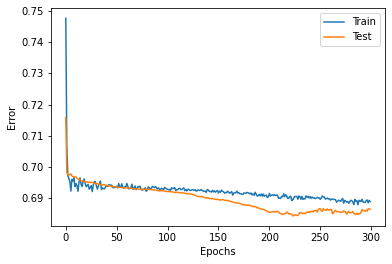

In [862]:
plt.plot(range(len(record_train_loss)), record_train_loss, label="Train")
plt.plot(range(len(record_test_loss)), record_test_loss, label="Test")
plt.legend()

# plt.xlim(0,100)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()